<a href="https://colab.research.google.com/github/bsdiaza/MetNumUN2023II/blob/main/laboratiorio%205/bsdiaza_grupo12_CuibicEquation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Modify [week_1_quadratic_Po_Shen_Loh.ipyn](https://colab.research.google.com/drive/15vXGB18_np6o0Rw8ZV4o08RTdCdDIdT0?usp=sharing) for

$$ ax^3+bx^2+cx +d = 0$$

using Cubic equation – Cardano–Tartaglia formula- [wikipedia](https://en.wikipedia.org/wiki/Cubic_equation)

Asuume $a=1$ then work wequations are of the form

$$ x^3+bx^2+cx +d = 0$$

Including explanataions. plots, solution code and test cases



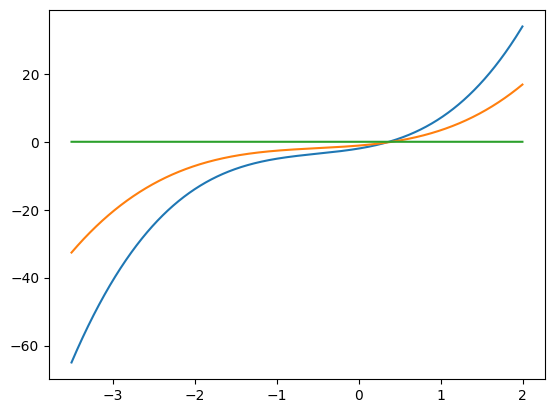

In [98]:
import numpy as np
import matplotlib.pyplot as plt

def cubic2(a,b,c,d,x):
    return a*x**3+b*x**2+c*x+d

def cubic(b,c,d,x):
    return x**3 + b*x**2 + c*x + d

def cubiqequiv(a,b,c,d,x):
    return (x+(b/(3*a)))**3+((3*a*c - b**2)/(3*a**2))*x+(b/(3*a))+((2*b**3-9*a*b*c+27*a**2*d)/(27*a**3))

x = np.arange(-3.5, 2, 0.001)
z = np.zeros(len(x))
y = cubic2(2, 3, 4, -2, x)
ynew = cubiqequiv(2, 3, 4, -2, x)
plt.plot(x,y, x,ynew, x,z)
plt.show()

In [97]:
import cmath

def solve_quad_Po_Shen_Loh(b, c):

    """
    Solve a quadratic equation, x**2 + bx + c = 0.

    Parameters
    ----------
    b, c : float
       Coefficients

    Returns
    -------
    u : The distance from b/2 to x and x2  and -1  if floting-point limitations
    x1, x2 : float or complex roots.  """

    discrim = (b/2)**2 - c
    ch = (b/2)**2
    if discrim == ch:
      u = -1
      po_x1 = -b
      po_x2 = -(c/-po_x1)

    elif discrim >= 0:
      u = cmath.sqrt(discrim)
      po_x1 = -((b/2) - u)
      po_x2 = -((b/2) + u)

    else:
      u = cmath.sqrt(discrim)
      po_x1 = -((b/2) - u)
      po_x2 = -((b/2) + u)

    return u, po_x1, po_x2

In [95]:
import cmath
import numpy as np
from numpy import allclose

def solve_cubic(b, c, d):
    """Solve a cubic equation, x**3 + bx**2 + c*x +d = 0.

    Parameters
    ----------
    b, c,d : float
       Coefficients

    Returns
    -------
    x1, x2,x3 : float or complex
       Roots.  """

    a = 1

    discrim_0 = b**2 - 3*a*c
    discrim_1 = 2*b**3 - 9*a*b*c + 27*(a**2)*d

    E = (-1 + (-3)**(1/2)) / 2

    C1 = ((discrim_1 + cmath.sqrt((discrim_1**2 - 4*discrim_0**3)))/2)**(1/3)
    C2 = ((discrim_1 - cmath.sqrt((discrim_1**2 - 4*discrim_0**3)))/2)**(1/3)

    C = C2 if discrim_0 == 0 else C1

    fraqs = [(discrim_0 / (C*E**i) if C != 0 else 0) for i in range(3)]

    [x1, x2, x3] = [(-(1/(3*a))*(b + C*E**i + fraqs[i])) for i in range(3)]

    if (not allclose(cubic(b,c,d,x1), 0.0) or not allclose(cubic(b,c,d,x2), 0.0) or not allclose(cubic(b,c,d,x3), 0.0)):
      if(allclose(cubic(b,c,d,x1), 0.0)):
        x1 = x1
      elif(allclose(cubic(b,c,d,x2), 0.0)):
        x1 = x2
      elif(allclose(cubic(b,c,d,x3), 0.0)):
        x1 = x3

      P1 = np.array([1, b, c ,d])
      P2 = np.array([1, -x1])

      [[po_a, po_b, po_c], y] = np.polydiv(P1, P2)

      po_b = po_b / po_a
      po_c = po_c / po_a

      u, po_x1, po_x2 = solve_quad_Po_Shen_Loh(po_b, po_c)
      x2 = po_x1
      x3 = po_x2

    return x1, x2, x3


Bulit test cases that include

$$(x-1) \left( x + \frac{1}{2} + i \frac{\sqrt{3}}{2}\right) \left( x + \frac{1}{2} - i \frac{\sqrt{3}}{2}\right) =   x^3 -1 =  0  $$

$$(x-1)^3 = x^3 - 3 x^2 + 3 x - 1 = 0 $$

$$(x-1)(x-i)(x+i) = x^3 - x^2 + x - 1 = 0 $$

$$ (x+2)^2 (x-1) = x^3 + 3 x^2 - 4 = 0  $$
three real diferent roots,  roots in the last digits of the group members, root of mtiuplicity two, and complex roots with small and large $b$.

**Last digits:**


In [99]:
from numpy import allclose

variants = [{'b': 0.0, 'c': 0.0, 'd': -1.0},
            {'b': -3.0, 'c': 3.0,  'd':-1.0},
            {'b': -1.0, 'c': 1.0,  'd':-1.0},
            {'b':  3.0, 'c': 0.0,  'd':-4.0},
            {'b':  80.0+5j, 'c': 0.0,  'd':-7.0},
            {'b':  10.0+5j, 'c': 20.0,  'd':-2.0j},
            {'b':  1000, 'c': 1.0,  'd':4.0},]

for var in variants:
    x1, x2, x3= solve_cubic(**var)
    print(allclose(cubic(var['b'],var['c'],var['d'],x1), 0.0) and allclose(cubic(var['b'],var['c'],var['d'],x2), 0.0) and  allclose(cubic(var['b'],var['c'],var['d'],x3), 0.0))

True
True
True
True
True
True
False
